In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv",encoding =('ISO-8859-1'))

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [46]:
df.rename(columns={'v1':'result','v2':'msgg'},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [47]:
df['result']=encoder.fit_transform(df['result'])

In [48]:
df.head()

,result,msgg,num_character,num_len,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.info()

In [ ]:
# check for missising value
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(keep='first')

In [ ]:
df.shape

In [49]:
df['result'].value_counts()

0    4825
1     747
Name: result, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

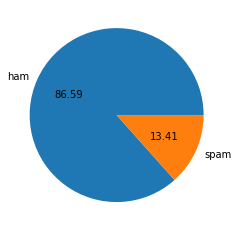

In [50]:
import matplotlib.pyplot as plt
plt.pie(df['result'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show

In [ ]:
!pip install nltk

In [11]:
import nltk

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
df['num_character']=df['msgg'].apply(len)

In [52]:
df.head()

,result,msgg,num_character,num_len,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [53]:
df['num_len']=df['msgg'].apply(lambda x:len(nltk.word_tokenize(x)))

In [15]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df['num_sentence']= df['msgg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [55]:
df[['num_character','num_len','num_sentence']].describe()

,num_character,num_len,num_sentence
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.695621,1.970747
std,59.690841,13.742587,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [57]:
df[df['result']==1][['num_character','num_len','num_sentence']].describe()

,num_character,num_len,num_sentence
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.017403
std,29.183082,6.867007,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [59]:
df[df['result']==0][['num_character','num_len','num_sentence']].describe()

,num_character,num_len,num_sentence
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.271917,1.808705
std,58.016023,13.988885,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [60]:
import seaborn as sns

<AxesSubplot:xlabel='num_character', ylabel='Count'>

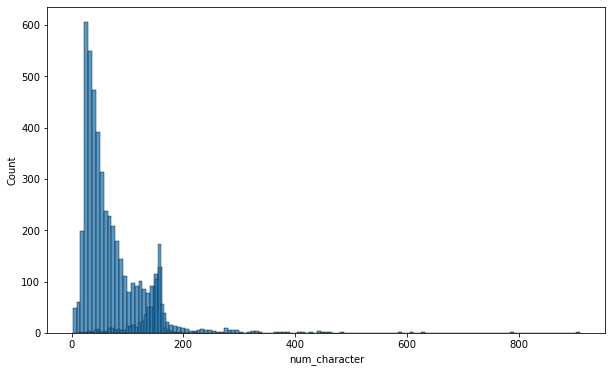

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['result']==0]['num_character'])
sns.histplot(df[df['result']==1]['num_character'])

<AxesSubplot:>

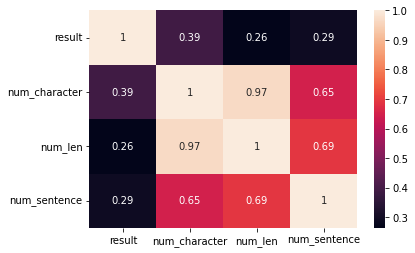

In [63]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# data preprocesing 
#lower case
# tokenization
# remove speial charaters
# streaming

In [69]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [74]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
def transformed_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
  
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
       
    return " ".join(y)

In [79]:
transformed_text('Sid loved to dancing on stage?')

'sid love danc stage'

In [80]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [81]:
df['transformed_text']= df['msgg'].apply(transform_text)

In [82]:
df.head()

,result,msgg,num_character,num_len,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [84]:
spam_list = []
for msg in df[df['result'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_list.append(word)


In [85]:
len(spam_list)

11490

In [86]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [88]:
x =tfidf.fit_transform(df['transformed_text']).toarray()

In [89]:
x.shape

(5572, 3000)

In [90]:
y = df['result'].values

In [91]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [94]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [95]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [96]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672645739910314
[[841 116]
 [ 32 126]]
0.5206611570247934


In [97]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [98]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9766816143497757
[[955   2]
 [ 24 134]]
0.9852941176470589


In [109]:
import pickle
pickle.dump(tfidf,open('vectorizer','wb'))
pickle.dump(mnb,open('model.pkl','wb'))